ABSTRACT


* Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

DATA SET INFORMATION

* Extraction was done by Barry Becker from the 1994 Census database. 

Prediction task is to determine whether a person makes over 50K a year.

INITIALIZATION

In [18]:
import os
import requests

CENSUS_DATASET = (
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
)

In [21]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]


data = pd.read_csv('adult.data', names=names)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
testdata = pd.read_csv('adult.test', names=names)
testdata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


* First look into the available values

In [42]:
cdata = pd.concat([data, testdata])
cdata.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48843.0,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,147.0,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,36.0,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,898.0,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,NaN,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,NaN,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,NaN,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,NaN,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,NaN,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


* First of all, we can see that the income_class column has 4 unique classes, but we expect to have only two.

In [43]:
cdata.income.value_counts(dropna=False)

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
NaN            1
Name: income, dtype: int64

In [35]:
testdata.income.value_counts(dropna=False)

 <=50K.    12435
 >50K.      3846
NaN            1
Name: income, dtype: int64

In [44]:
data.income.value_counts(dropna=False)

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

* If we compare number of unique categorical features for other variables it's easy to see that workclass, occupation and native_country have one extra unique value (+1 unique values compare to the description from the Dataset Description.odt) in the data. One extra class equals to ?. It looks like this values has to be replaced with NaN.

In [45]:
cdata.occupation.value_counts(dropna=False).to_frame()

,occupation
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355
Handlers-cleaners,2072


In [46]:
cdata.workclass.value_counts(dropna=False).to_frame()

,workclass
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10
NaN,1


* We can confirm that those are the only columns that have value equal to ?.

In [59]:
(cdata == ' ?').sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

VIZUALIZATION

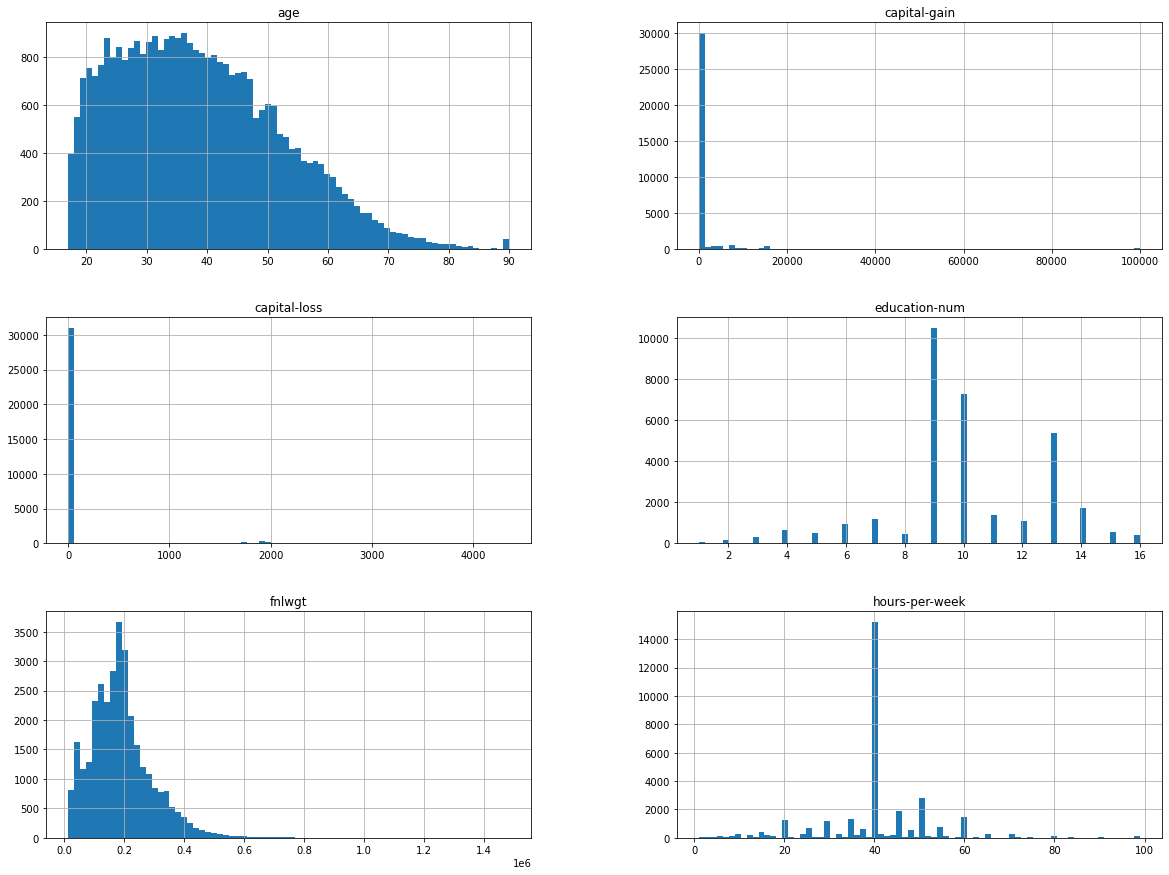

In [78]:
data.hist(bins=74, figsize=(20,15))
plt.show()

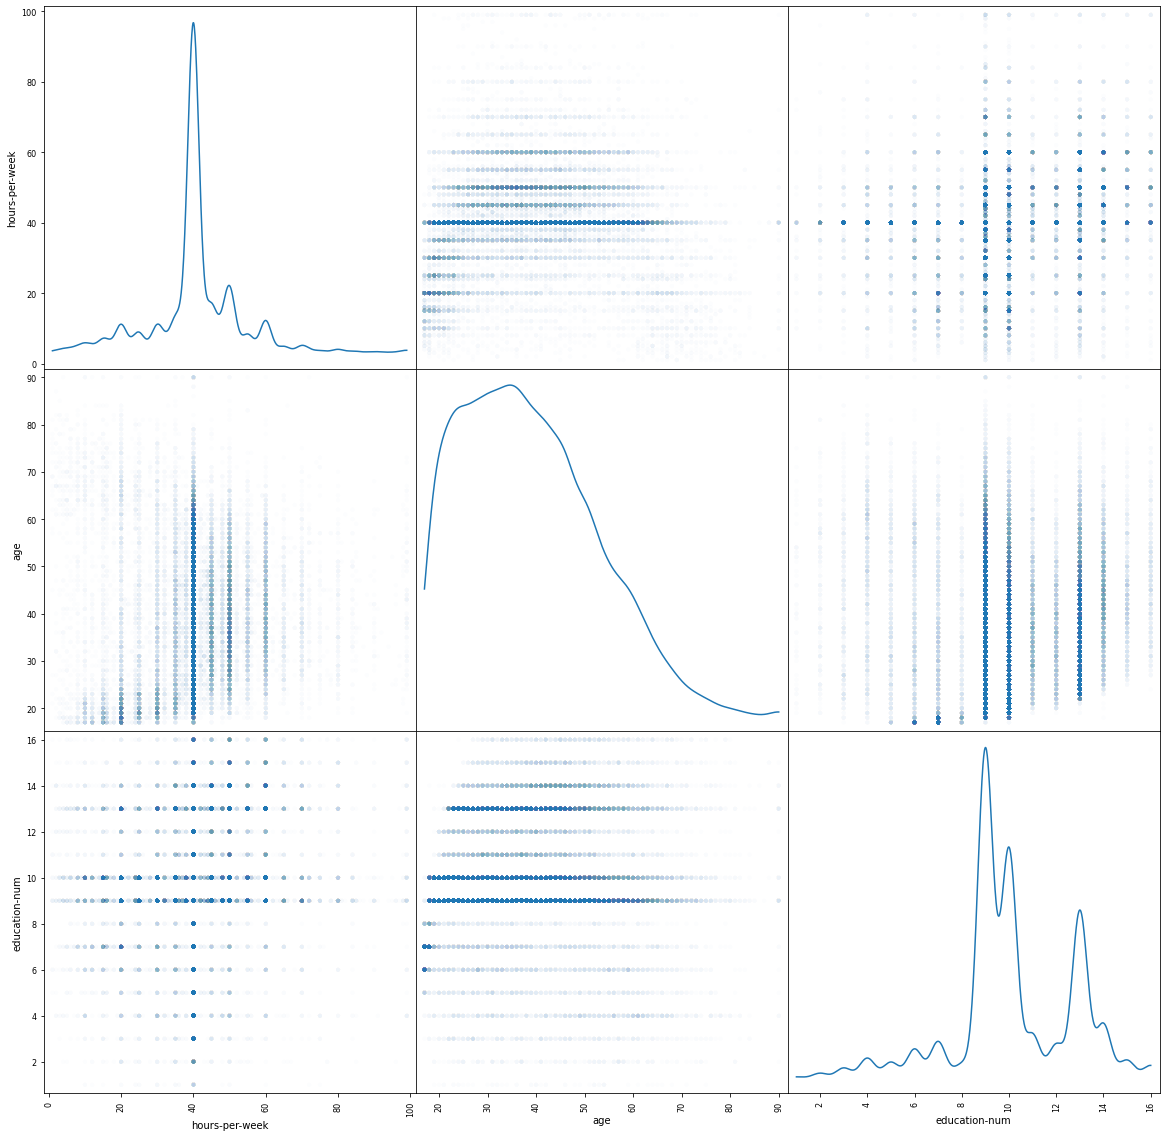

In [139]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(data[['hours-per-week', 'age', 'education-num', ]], 
                   alpha = 0.01, figsize = (20, 20), diagonal = 'kde', s = 80, linewidth = 3)


Plots of Categorical Data

blue  =male income less than 50k
orange=male income more than 50k
green =female income less than 50k
red   =female income more than 50k

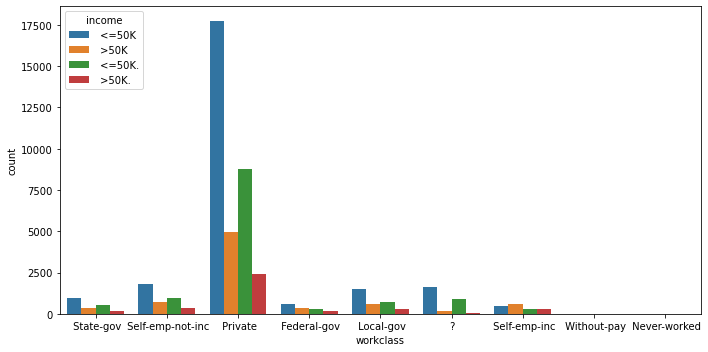

In [97]:
fig = plt.figure(figsize=(10,5))
sns.countplot('workclass', hue='income', data=cdata)
plt.tight_layout()
plt.show()

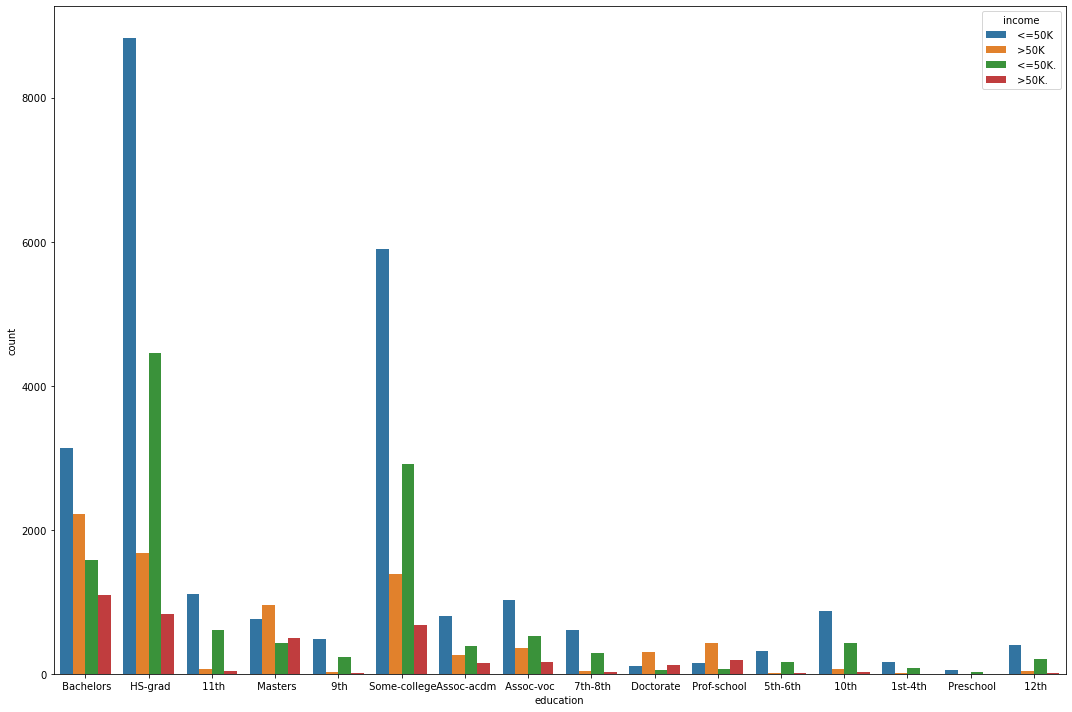

In [98]:
fig = plt.figure(figsize=(15,10))

sns.countplot('education', hue='income', data=cdata)
plt.tight_layout()
plt.show()


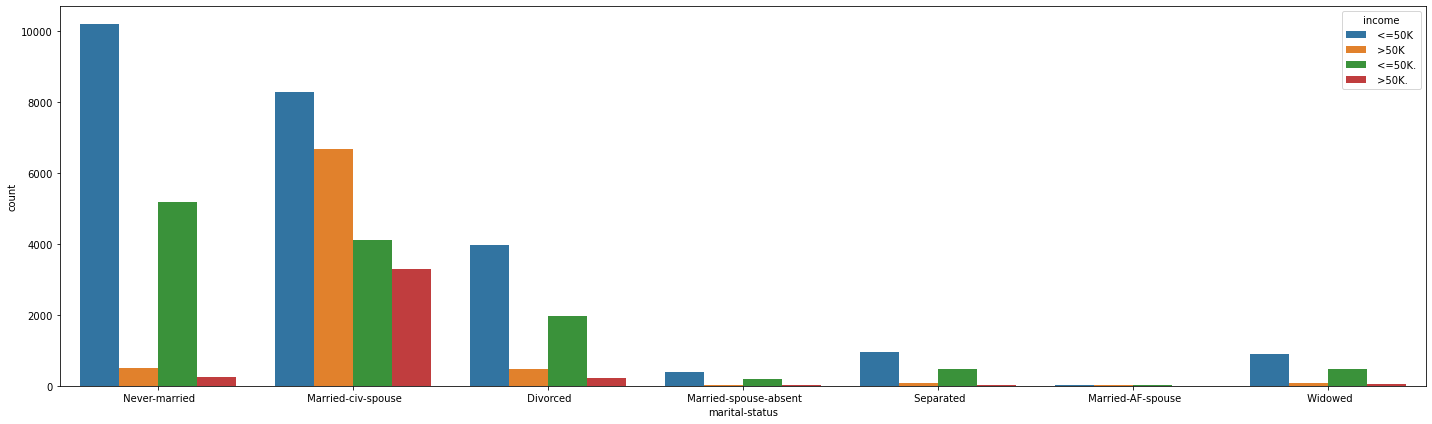

In [100]:
fig = plt.figure(figsize=(20,6))

sns.countplot('marital-status', hue='income', data=cdata)
plt.tight_layout()
plt.show()

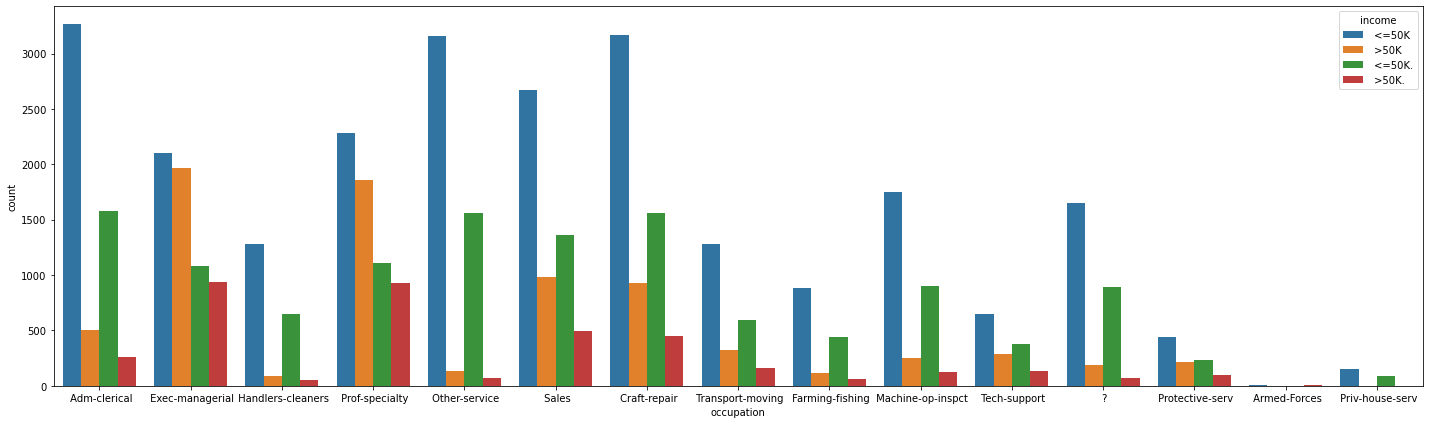

In [101]:
fig = plt.figure(figsize=(20,6))

sns.countplot('occupation', hue='income', data=cdata)
plt.tight_layout()
plt.show()


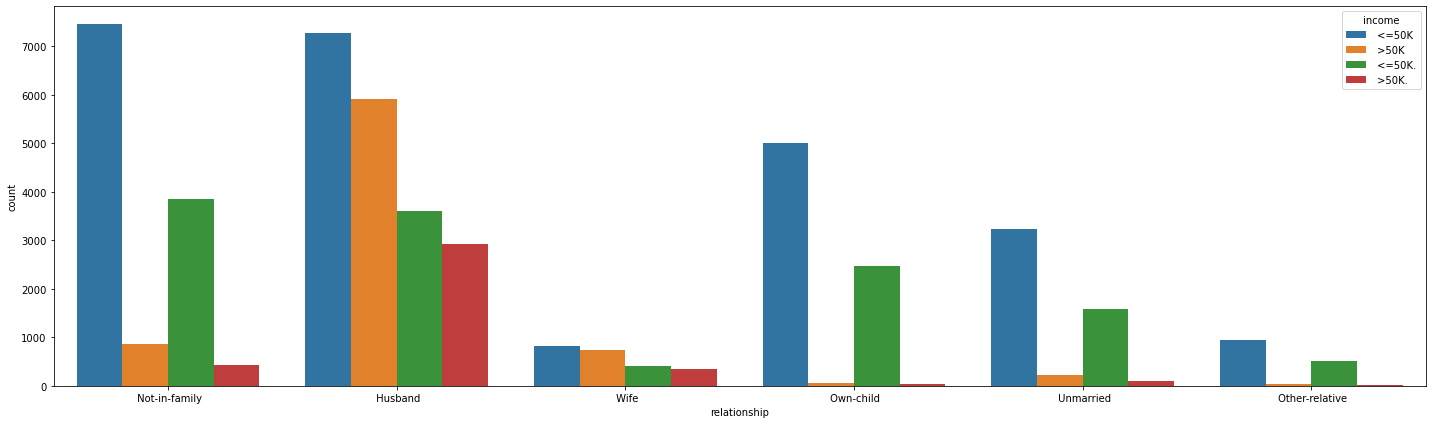

In [102]:
fig = plt.figure(figsize=(20,6))

sns.countplot('relationship', hue='income', data=cdata)
plt.tight_layout()
plt.show()

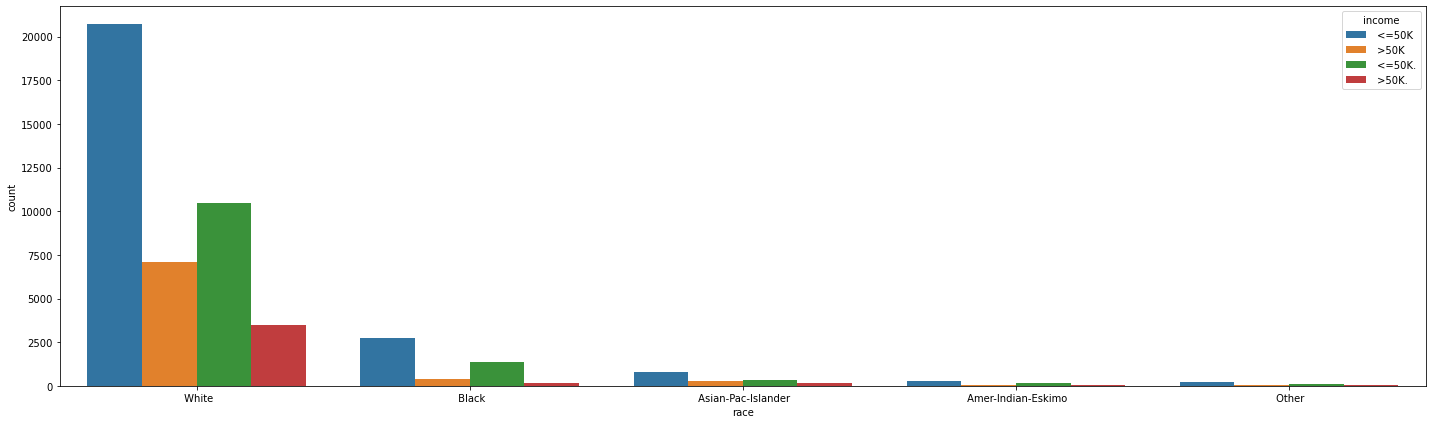

In [103]:
fig = plt.figure(figsize=(20,6))

sns.countplot('race', hue='income', data=cdata)
plt.tight_layout()
plt.show()

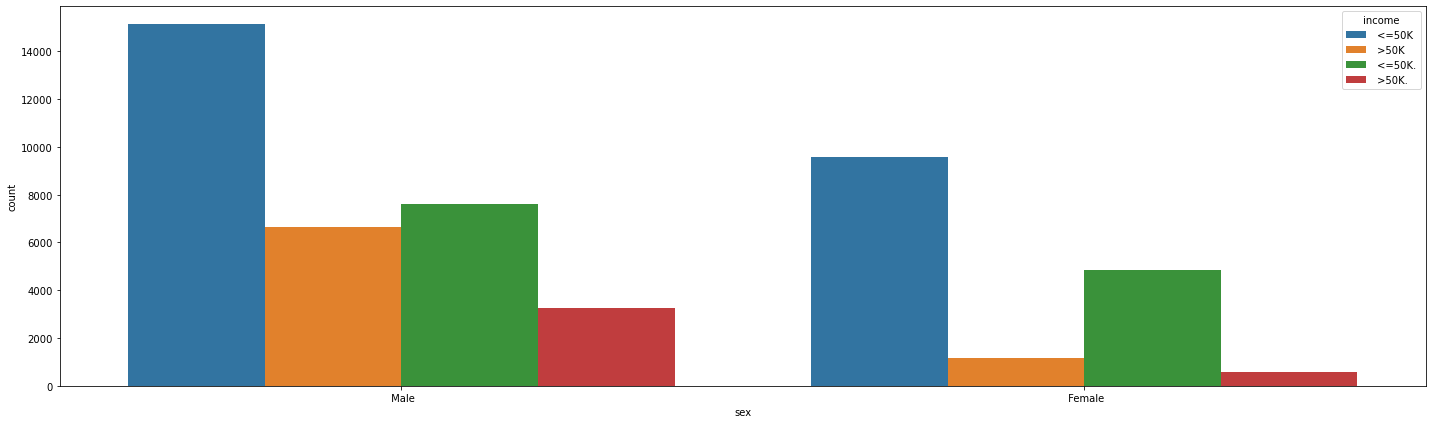

In [114]:
fig = plt.figure(figsize=(20,6))

sns.countplot('sex', hue='income', data=cdata)
plt.tight_layout()
plt.show()

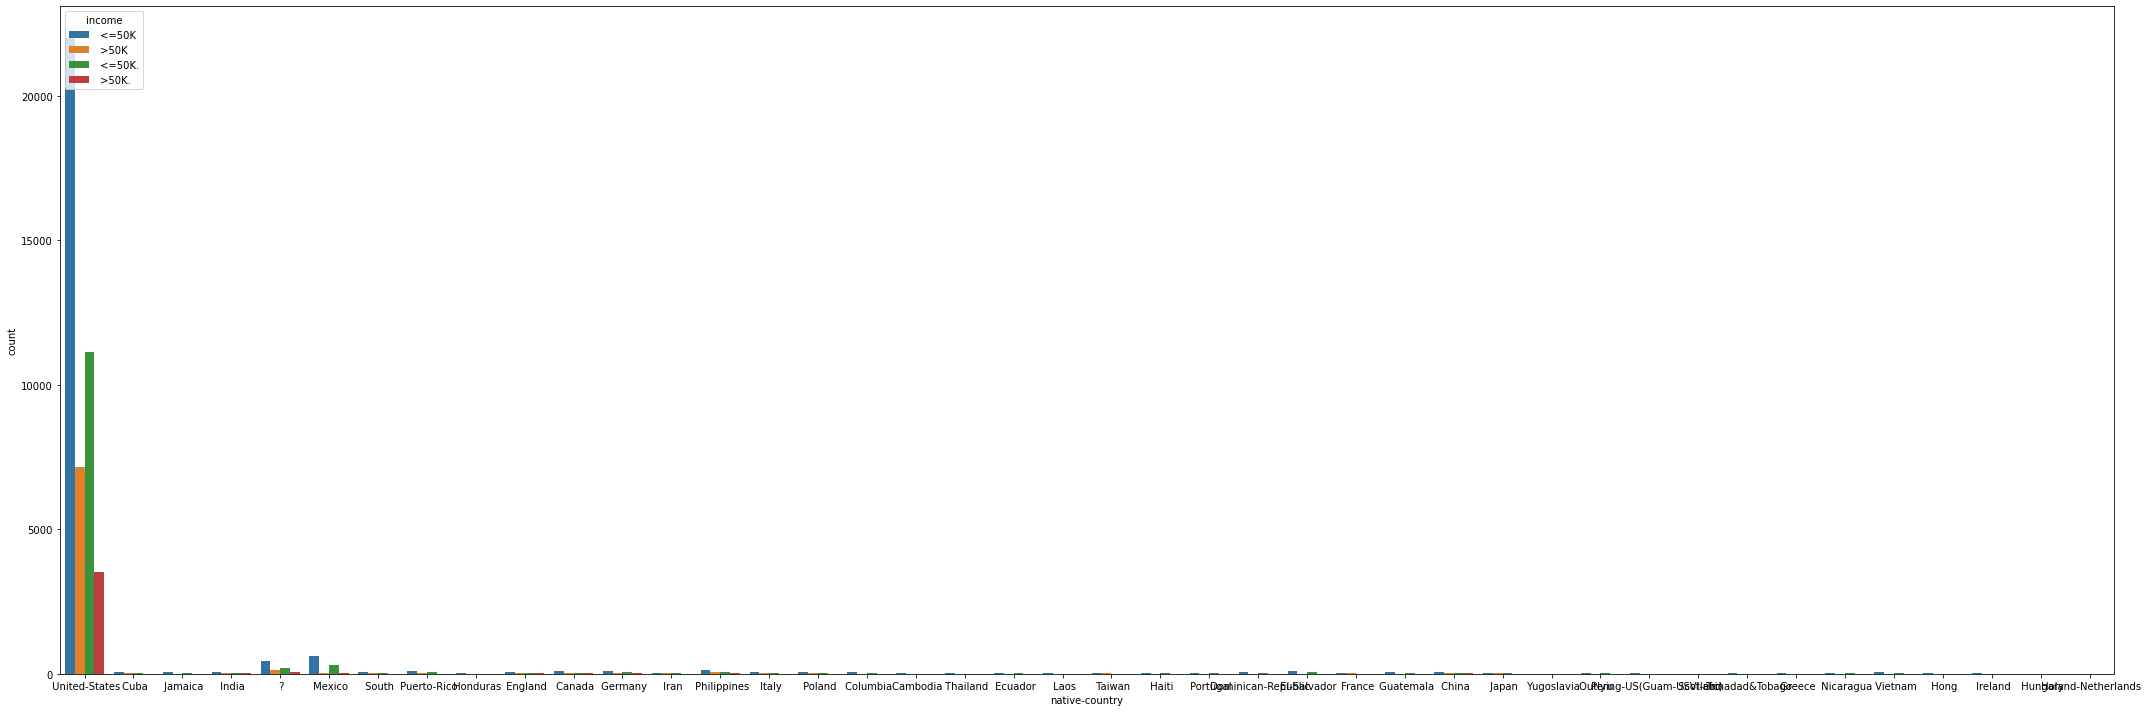

In [116]:
fig = plt.figure(figsize=(30,10))

sns.countplot('native-country', hue='income', data=cdata)
plt.tight_layout()
plt.show()

EDA

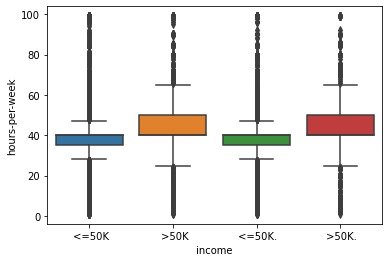

In [117]:
sns.boxplot(y='hours-per-week',x='income',data=cdata)

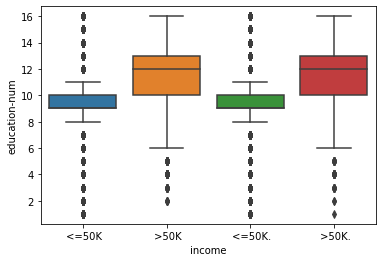

In [120]:
sns.boxplot(y='education-num',x='income',data=cdata)

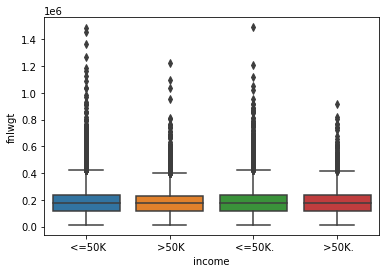

In [121]:
sns.boxplot(y='fnlwgt',x='income',data=cdata)

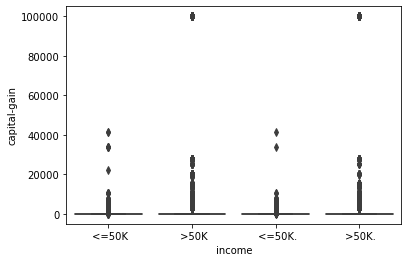

In [123]:
sns.boxplot(y='capital-gain',x='income',data=cdata)

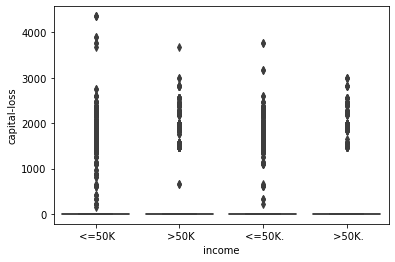

In [125]:
sns.boxplot(y='capital-loss',x='income',data=cdata)

In [131]:
dumydata=pd.get_dummies(cdata, columns=["workclass", "education", "marital-status", "occupation"])
dumydata

,age,fnlwgt,education-num,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,77516.0,13.0,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,...,0,0,0,0,0,0,0,0,0,0
1,50,83311.0,13.0,Husband,White,Male,0.0,0.0,13.0,United-States,...,0,0,0,0,0,0,0,0,0,0
2,38,215646.0,9.0,Not-in-family,White,Male,0.0,0.0,40.0,United-States,...,0,1,0,0,0,0,0,0,0,0
3,53,234721.0,7.0,Husband,Black,Male,0.0,0.0,40.0,United-States,...,0,1,0,0,0,0,0,0,0,0
4,28,338409.0,13.0,Wife,Black,Female,0.0,0.0,40.0,Cuba,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,215419.0,13.0,Not-in-family,White,Female,0.0,0.0,36.0,United-States,...,0,0,0,0,0,1,0,0,0,0
16278,64,321403.0,9.0,Other-relative,Black,Male,0.0,0.0,40.0,United-States,...,0,0,0,0,0,0,0,0,0,0
16279,38,374983.0,13.0,Husband,White,Male,0.0,0.0,50.0,United-States,...,0,0,0,0,0,1,0,0,0,0
16280,44,83891.0,13.0,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,...,0,0,0,0,0,0,0,0,0,0


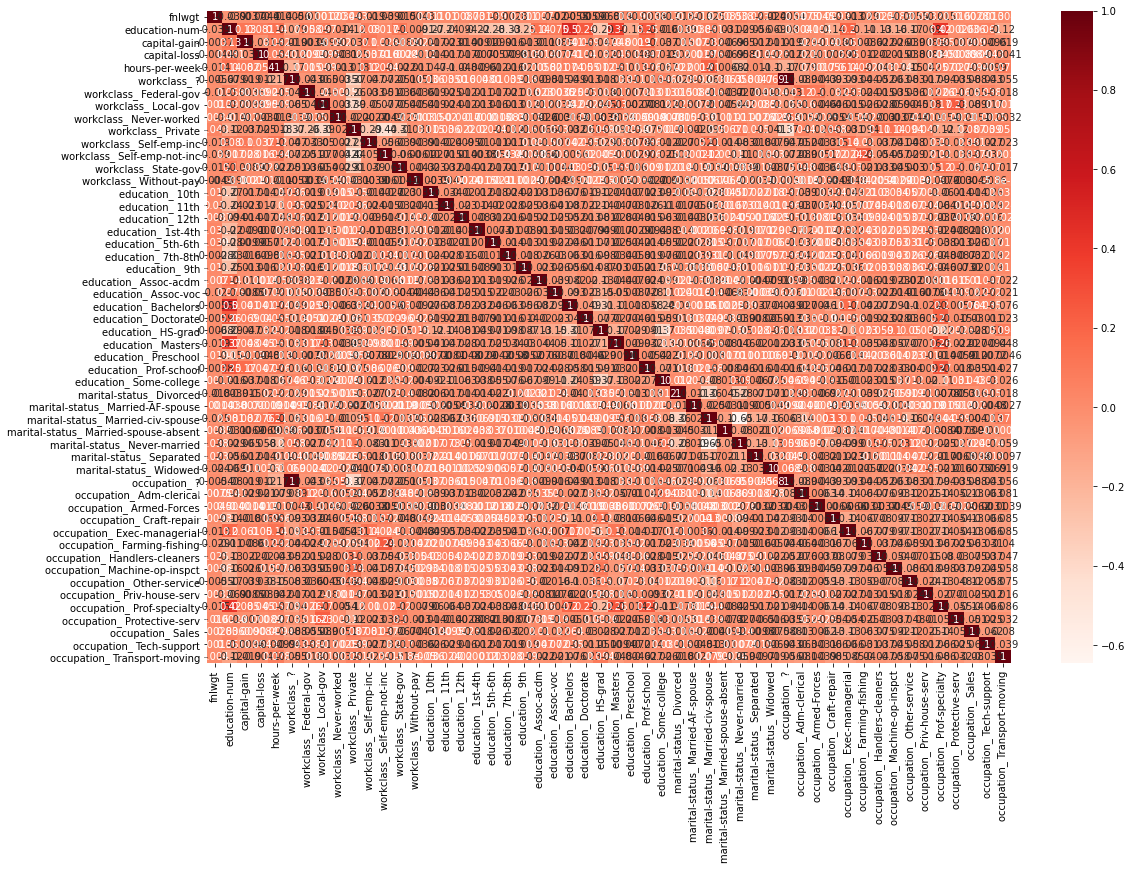

In [140]:
corr =dumydata.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,cmap='Reds',annot=True)

In [149]:
dumydata=pd.get_dummies(cdata, columns=["workclass", "education", "marital-status", "occupation"])
dumydata

,age,fnlwgt,education-num,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,77516.0,13.0,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,...,0,0,0,0,0,0,0,0,0,0
1,50,83311.0,13.0,Husband,White,Male,0.0,0.0,13.0,United-States,...,0,0,0,0,0,0,0,0,0,0
2,38,215646.0,9.0,Not-in-family,White,Male,0.0,0.0,40.0,United-States,...,0,1,0,0,0,0,0,0,0,0
3,53,234721.0,7.0,Husband,Black,Male,0.0,0.0,40.0,United-States,...,0,1,0,0,0,0,0,0,0,0
4,28,338409.0,13.0,Wife,Black,Female,0.0,0.0,40.0,Cuba,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,215419.0,13.0,Not-in-family,White,Female,0.0,0.0,36.0,United-States,...,0,0,0,0,0,1,0,0,0,0
16278,64,321403.0,9.0,Other-relative,Black,Male,0.0,0.0,40.0,United-States,...,0,0,0,0,0,0,0,0,0,0
16279,38,374983.0,13.0,Husband,White,Male,0.0,0.0,50.0,United-States,...,0,0,0,0,0,1,0,0,0,0
16280,44,83891.0,13.0,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
sns.stripplot(dumydata['education-num'],dumydata['age'],hue=dumydata['income'],data=dumydata)

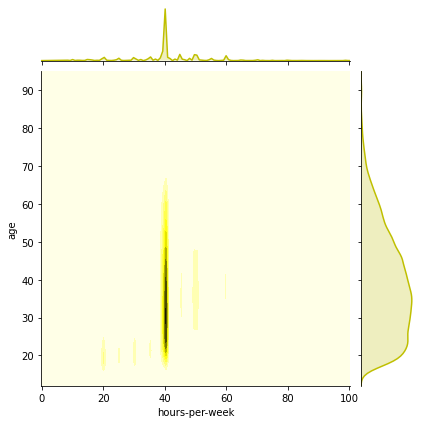

In [163]:
sns.jointplot(dumydata['hours-per-week'],dumydata['age'],kind='kde',color='y',data=dumydata)